# ✨⭐ **CAPSTONE 3**
# 🚲 **BIKE SHARING PREDICTION PROJECT** 🤖
## **METHOD: REGRESSION**
### By: Clarinda Puspitajati

---

## **1. BUSINESS PROBLEMS & OBJECTIVE**

### **Context**

Capital Bikeshare (CaBi) had more than 700 stations and 5,400 bikes in operation across Washington D.C. and the suburbs as of January 2023. This automated bike-sharing program supports sustainable urban mobility, minimizes the carbon footprint, and promotes physical wellness. For city planners and transportation managers, CaBi’s continuous rider and traffic data collection since 2010 provides invaluable insights.  

It is fairly easy to manage the distribution of bikes across 700 stations, but the weather, time of day, and even season all add layers of complexity. If accurate demand prediction algorithms are not generated, there will be a high probability of user dissatisfaction due to bike over-filling or under-filling.

### **Stakeholders:**

> - Operators of bike sharing services (for foreseeing demand)
> 
>- Urban planners (for planning consisting of roads, bridges, and other infrastructural projects) 
> 
> - Riders (for accessibility)
  
### **Problem Statement**  
Bicycle utilization forecasting is essential for station management optimization, supporting a balanced supply, equitable distribution throughout the day, and sustaining a steady supply integration.
  
### **Goals**  
Using time, weather, and temperature as independent variables, we aim to construct a computer learning model that predicts rental services. The predictive model will provide accurate forecasts which, in turn, will streamline operations, optimize the system’s bike flow, and substantiate decisions made on empirical evidence. 

### **Analytic Approach**  

To forecast bike usage, we will use regression techniques. Our approach includes:  

- Collecting information: Systematic data cleaning such as filling in gaps, removing duplicate data entries, and proper reconstruction of formatting will be executed.
  
- Feature Selection: Identify important features which have a high effect on the prediction alongside the dependent variable of interest. 

- Data Split: Allocate the data into training (80%) and test data set (20%).
  
- Preprocessing: Outlier treatments, feature scaling, and encoding categories. 

- Outer loop cross-validation: Compare a range of models and their configuration settings from a predetermined benchmark to select the best fitting model to the given dataset.  

- Hyperparameter tuning: Model results are improved by modifying design parameters of the defined model.

- Evaluation: Apply the specified cross-validation testing set to evaluate model accuracy against predetermined regression metrics.

- Estimation of Operation Improvement: Capture useful metrics to model suggested changes and derive targeted operational KPIs. 

### **Metrics**

The following metrics will be outlined regarding model evaluation: 
 
- RMSE (Root Mean Squared Error): The aggregate error in overall predictions.

- MAE (Mean Absolute Error): Average prediction error.

- MAPE (Mean Absolute Percentage Error): Accuracy expressed as a percentage yield.

- R2 (Coefficient of Determination): Ratio of explained variance in the actual values that can be attributed to the model; it takes values from 0 (no explanatory power) to 1 (perfect fit). Higher R2 means the model better captures the variability in the outcome.

  
  
The objective remains capturing more accurate forecasts by reducing the described metrics.



## **IMPORTING LIBRARIES**

In [1]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imputation for missing values
from sklearn.impute import SimpleImputer

# Regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, make_scorer, mean_squared_log_error

# Utility
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


---

## **DATA UNDERSTANDING**

### **Context**
- The dataset records hourly bike rental counts from an automated bike-sharing system.
- It captures both environmental conditions and temporal information, making it suitable for predicting demand and analyzing usage patterns.

### **Data Source**
- Data comes from a real bike-sharing system, given by Purwadhika as my Capstone project.
- Weather information is sourced from freemeteo.com.


## **Column/Feature Understanding**
| Column Name   | Data Type   | Description                                                                                      | Example Value |
|---------------|------------|--------------------------------------------------------------------------------------------------|--------------|
| **dteday**    | Date       | Date of the record (YYYY-MM-DD)                                                                  | 2011-12-09   |
| **hum**       | Float      | Normalized humidity (0–1, where 1 = 100%)                                                        | 0.62         |
| **weathersit**| Integer    | Weather situation: 1 = Clear, 2 = Mist/Cloudy, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow      | 1            |
| **holiday**   | Integer    | Whether the day is a holiday (0 = No, 1 = Yes)                                                   | 0            |
| **season**    | Integer    | Season: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall                                            | 4            |
| **atemp**     | Float      | Normalized “feels like” temperature in Celsius (0–1)                                             | 0.3485       |
| **temp**      | Float      | Normalized actual temperature in Celsius (0–1)                                                   | 0.36         |
| **hr**        | Integer    | Hour of the day (0–23)                                                                           | 16           |
| **casual**    | Integer    | Count of casual (non-registered) users for the hour                                              | 24           |
| **registered**| Integer    | Count of registered users for the hour                                                           | 226          |
| **cnt**       | Integer    | **Total count of rental bikes (target variable)**                                                | 250          |

---

### **Key Points for Modeling**

- **Target Variable:**  
  - `cnt` (total bike rentals per hour)
- **Predictor Variables:**  
  - Use: `hr`, `season`, `holiday`, `weathersit`, `temp`, `atemp`, `hum`
  - Consider removing: `casual` and `registered` (to avoid data leakage, since their sum is `cnt`)
  - `dteday` can be used for time-based feature engineering (e.g., day of week), but is not directly predictive as a string.

---

### **Categorical Features**
- `season`, `weathersit`, `holiday`, and `hr` (can be treated as categorical or ordinal, depending on the model).

### **Numerical Features**
- `temp`, `atemp`, `hum` (all normalized between 0 and 1).

---

## **Summary Table**

| Feature         | Type        | Role            | Notes                                                         |
|-----------------|-------------|-----------------|---------------------------------------------------------------|
| dteday          | Date        | Optional        | For time-based features, not used directly                    |
| hum             | Numerical   | Predictor       | Normalized humidity                                           |
| weathersit      | Categorical | Predictor       | Weather situation (1-4)                                       |
| holiday         | Categorical | Predictor       | 0 = No, 1 = Yes                                               |
| season          | Categorical | Predictor       | 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall                  |
| atemp           | Numerical   | Predictor       | Normalized “feels like” temp                                  |
| temp            | Numerical   | Predictor       | Normalized actual temp                                        |
| hr              | Categorical | Predictor       | Hour of day (0-23)                                            |
| casual          | Numerical   | Remove          | Data leakage risk (component of target)                       |
| registered      | Numerical   | Remove          | Data leakage risk (component of target)                       |
| cnt             | Numerical   | **Target**      | Total bike rentals per hour                                   |

---

## **How This Relates to the Business Context**

- **Business Goal:** Predict hourly bike rental demand to optimize fleet management, staffing, and operations.
- **Stakeholders:** Bike-sharing operators, city planners, and users benefit from accurate demand forecasting.




---

## **DATA PREPARATION: BIKE SHARING**

In [2]:
df = pd.read_csv(r'C:\PURWADHIKA\CAPSTONE 3\data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


Check Missing Values

In [3]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

Check Duplicated data.

In [4]:
df.duplicated().sum()

0

No missing value found, no duplicated data found in the dataset.

Checking how many rows and columns in the dataset?

In [5]:
df.shape

(12165, 11)

In [6]:
# Calculate skewness and kurtosis for numerical columns
skewness = df[['cnt', 'temp', 'atemp', 'hum', 'casual', 'registered']].skew()
kurtosis = df[['cnt', 'temp', 'atemp', 'hum', 'casual', 'registered']].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 cnt           1.267723
temp         -0.008967
atemp        -0.090450
hum          -0.092505
casual        2.476743
registered    1.550608
dtype: float64

Kurtosis:
 cnt           1.381901
temp         -0.956145
atemp        -0.863533
hum          -0.826167
casual        7.381003
registered    2.725666
dtype: float64


INSIGHT!

> 'casual' and 'registered' are highly right-skewed and have heavy tails (high kurtosis).

> 'cnt' (target) is moderately right-skewed, indicating that most bike rentals are lower with a few high values.

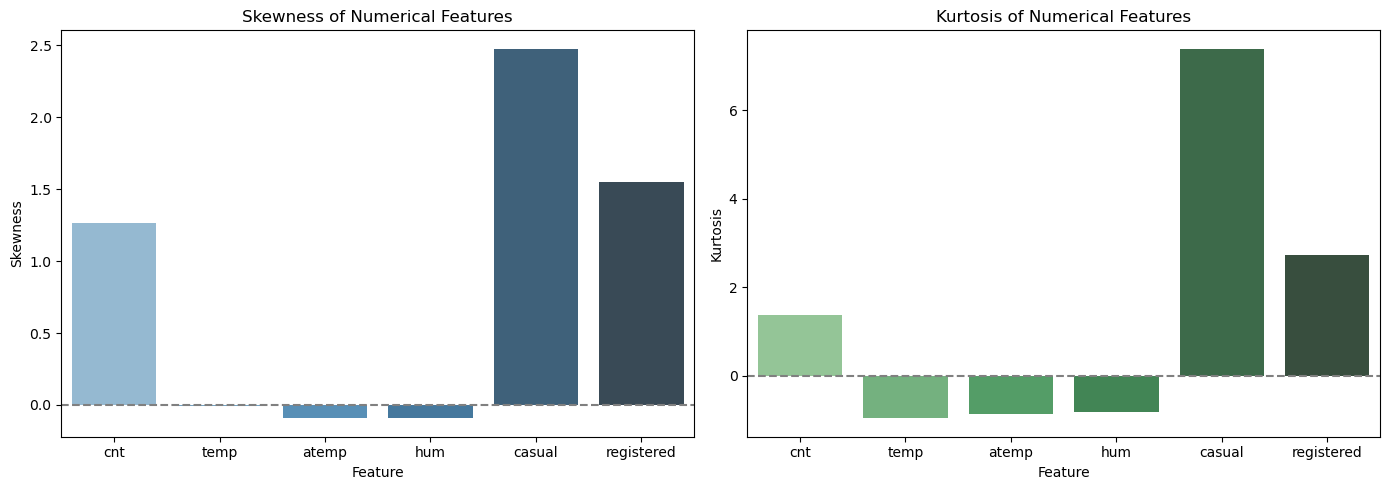

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Skewness
sns.barplot(x=skewness.index, y=skewness.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Skewness of Numerical Features')
axes[0].set_ylabel('Skewness')
axes[0].set_xlabel('Feature')
axes[0].axhline(0, color='gray', linestyle='--')

# Kurtosis
sns.barplot(x=kurtosis.index, y=kurtosis.values, ax=axes[1], palette='Greens_d')
axes[1].set_title('Kurtosis of Numerical Features')
axes[1].set_ylabel('Kurtosis')
axes[1].set_xlabel('Feature')
axes[1].axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

INSIGHT!

> - Bars above zero indicate right skew and heavy tails.
> - Provides a clear visual cue for data transformation needs (e.g., log scaling).

In [8]:
print("Skewness:\n", skewness.round(2))
print("\nKurtosis:\n", kurtosis.round(2))

print("\nInterpretation:")
print("- Skewness > 0: Right-skewed (long tail to the right)")
print("- Skewness < 0: Left-skewed (long tail to the left)")
print("- Kurtosis > 0: Heavy tails (more outliers)")
print("- Kurtosis < 0: Light tails (fewer outliers)")

print("\nSummary:")
print("• 'casual' and 'registered' are highly right-skewed with heavy tails.")
print("• 'cnt' (target) is moderately right-skewed and has heavier tails than normal.")

Skewness:
 cnt           1.27
temp         -0.01
atemp        -0.09
hum          -0.09
casual        2.48
registered    1.55
dtype: float64

Kurtosis:
 cnt           1.38
temp         -0.96
atemp        -0.86
hum          -0.83
casual        7.38
registered    2.73
dtype: float64

Interpretation:
- Skewness > 0: Right-skewed (long tail to the right)
- Skewness < 0: Left-skewed (long tail to the left)
- Kurtosis > 0: Heavy tails (more outliers)
- Kurtosis < 0: Light tails (fewer outliers)

Summary:
• 'casual' and 'registered' are highly right-skewed with heavy tails.
• 'cnt' (target) is moderately right-skewed and has heavier tails than normal.


INSIGHT!
> The data is right-skewed, the distributions may need transformation for linear models to work effectively

Feature Distribution (Categorical & Numerical)

- Numerical Features: 
  - Plot histograms for:
    -  `temp`, `atemp`, `hum`.

- Categorical Features: 
  - Bar plots for:
    -  `season`, `weathersit`, `holiday`, `hr`.

Creating histograms for both numerical and categorical features

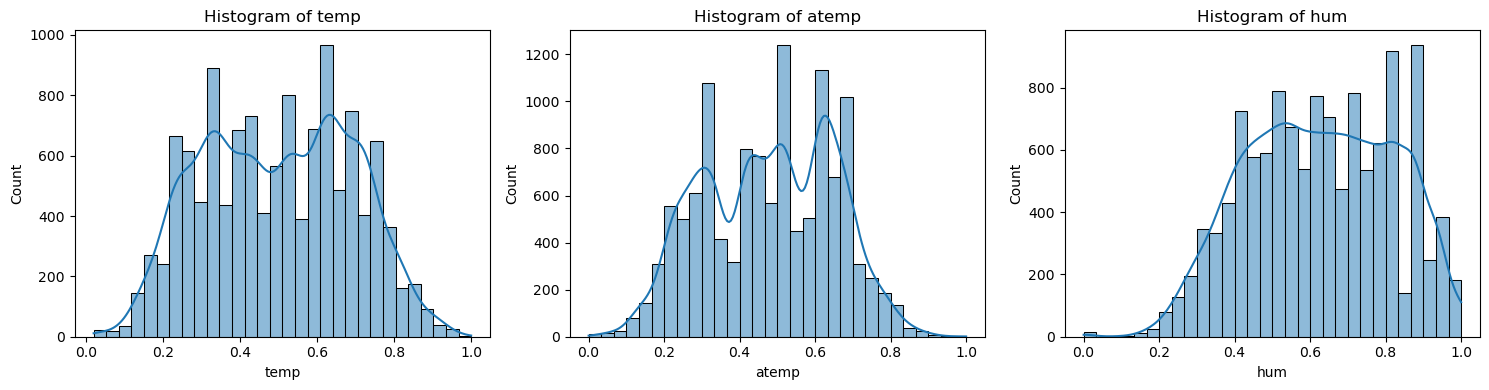

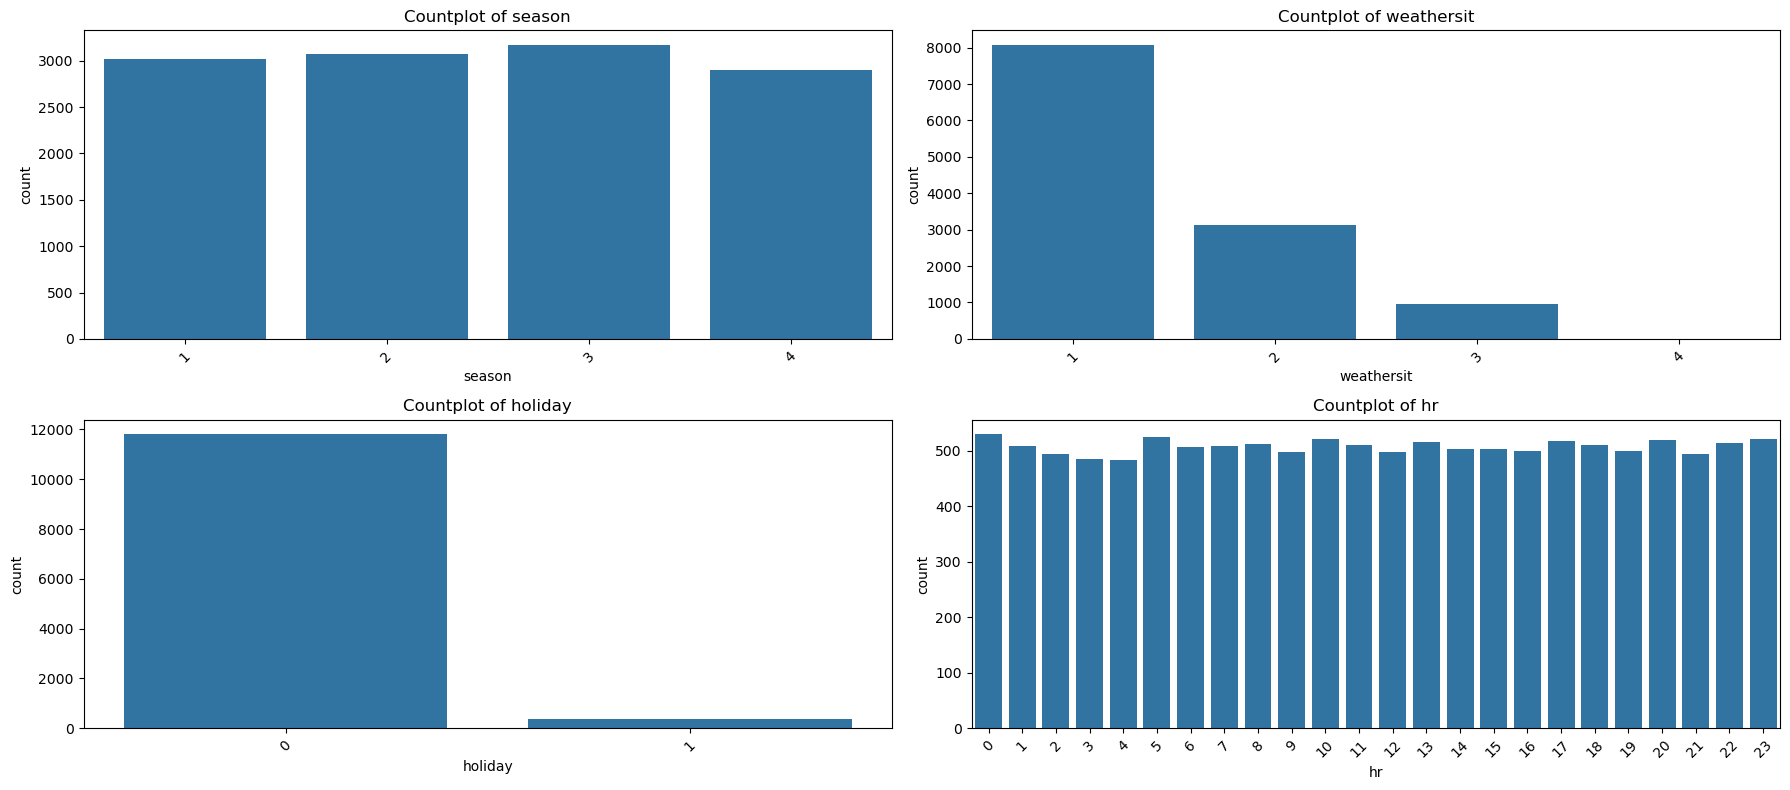

In [9]:
# Numerical Features: Histograms
num_features = ['temp', 'atemp', 'hum']
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Categorical Features: Bar plots
cat_features = ['season', 'weathersit', 'holiday', 'hr']
plt.figure(figsize=(18, 8))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHT!
> - Focusing on `temp`, `atemp`, `hum`  columns only.
> - All three distributions appear continuous and likely normal but need checking for outliers.



Checking correlation & Heatmap

Using `df.corr` only includes numbers (integers and floats)

In [10]:
df.select_dtypes(include=[np.number]).corr()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
hum,1.000000,0.415240,-0.011946,0.145679,-0.051782,-0.068842,-0.279156,-0.345498,-0.269805,-0.319227
weathersit,0.415240,1.000000,-0.022009,-0.017910,-0.105332,-0.103030,-0.018132,-0.148261,-0.121773,-0.141983
holiday,-0.011946,-0.022009,1.000000,-0.006507,-0.026845,-0.023884,-0.000848,0.036796,-0.048350,-0.030250
season,0.145679,-0.017910,-0.006507,1.000000,0.326234,0.319737,-0.011831,0.132017,0.179896,0.185991
atemp,-0.051782,-0.105332,-0.026845,0.326234,1.000000,0.987352,0.140835,0.452337,0.330228,0.398763
temp,-0.068842,-0.103030,-0.023884,0.319737,0.987352,1.000000,0.143867,0.456828,0.331619,0.401149
hr,-0.279156,-0.018132,-0.000848,-0.011831,0.140835,0.143867,1.000000,0.303310,0.374755,0.395179
casual,-0.345498,-0.148261,0.036796,0.132017,0.452337,0.456828,0.303310,1.000000,0.506877,0.695555
registered,-0.269805,-0.121773,-0.048350,0.179896,0.330228,0.331619,0.374755,0.506877,1.000000,0.971898
cnt,-0.319227,-0.141983,-0.030250,0.185991,0.398763,0.401149,0.395179,0.695555,0.971898,1.000000


INSIGHT!

> - Strong correlations can indicate multicollinearity or redundancy.

> - `cnt` should show strong positive correlations with `registered` and `casual`.

Heatmap

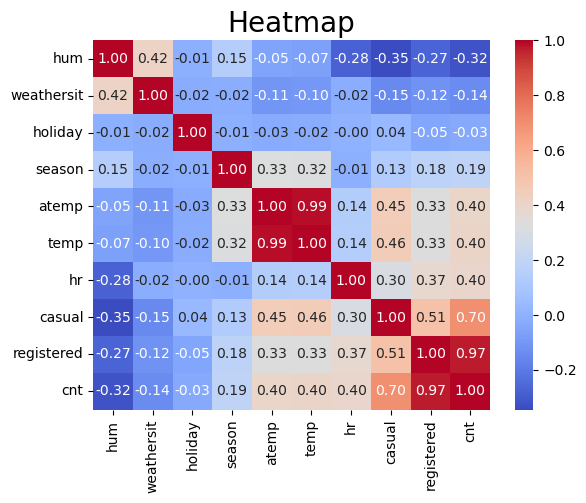

In [11]:
plt.figure
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap', fontsize=20)
plt.show()


INSIGHT!

> - Focusing on `season`, `weathersit`, `holiday`, `hr` columns only.
> - High positive correlation between `registered` and `cnt`.

### **VISUALIZATIONS**

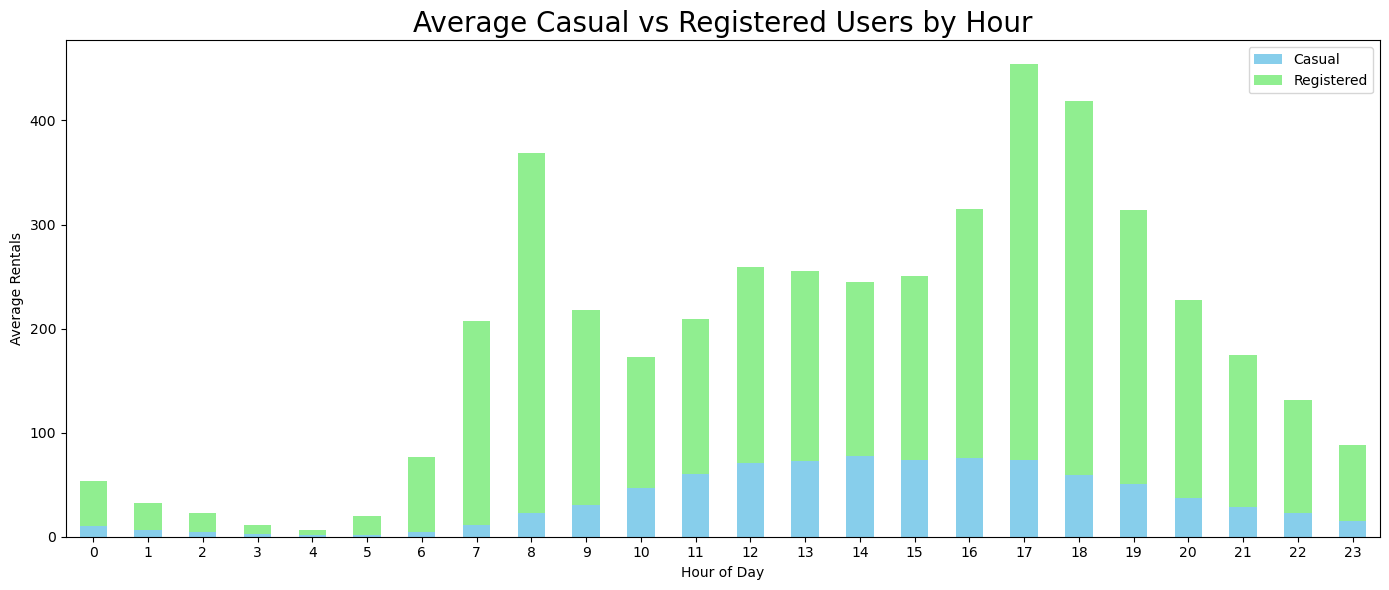

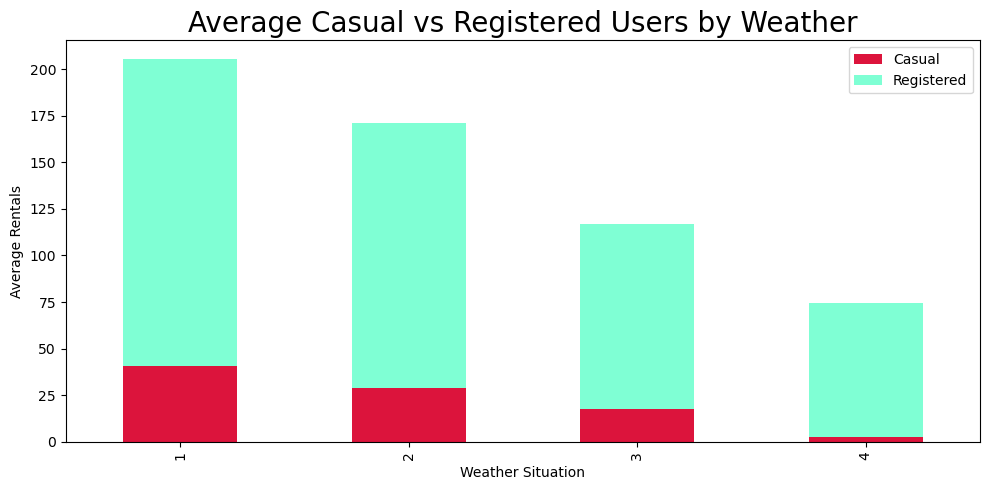

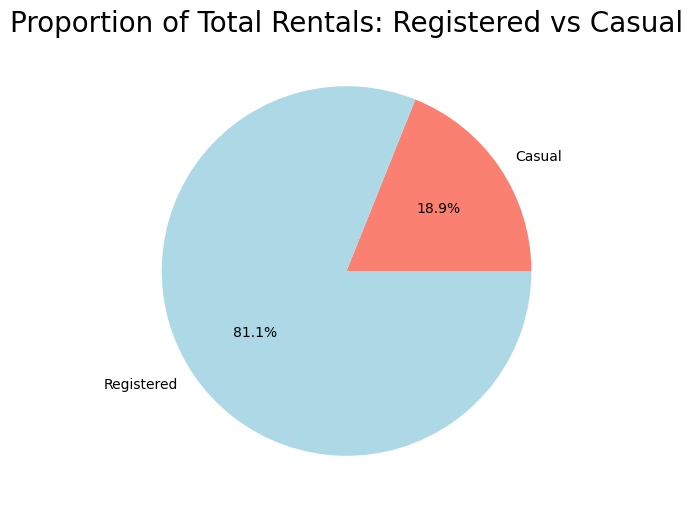

In [12]:
# Stacked bar plot: Average casual and registered users by hour
hourly = df.groupby('hr')[['casual', 'registered']].mean()
hourly.plot(kind='bar', stacked=True, figsize=(14,6), color=['skyblue', 'lightgreen'])
plt.xticks(rotation=0)
plt.title('Average Casual vs Registered Users by Hour', size=20)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

# Stacked bar plot: Average casual and registered users by weather
weather = df.groupby('weathersit')[['casual', 'registered']].mean()
weather.plot(kind='bar', stacked=True, figsize=(10,5), color=['crimson', 'aquamarine'])
plt.title('Average Casual vs Registered Users by Weather', size=20)
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

# Pie plot: Share of total rentals (registered vs casual)
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()
plt.figure(figsize=(6,6))
plt.pie([total_casual, total_registered], labels=['Casual', 'Registered'], autopct='%1.1f%%', colors=['salmon', 'lightblue'])
plt.title('Proportion of Total Rentals: Registered vs Casual', size=20)
plt.show()

INSIGHT!

> - **HOURLY USAGE**: Shows that registered users domminate peak commute hours (8PM, 5-6 PM)
> - **WEATHER USAGE**: Casual usage drops significantly in worse weather.
> - **PIE CHART**: Registered users make up a larger portion of total rentals (around 81.1%)

#### **CHECKING OUTLIERS? IQR? Q1, Q2, Q3?**

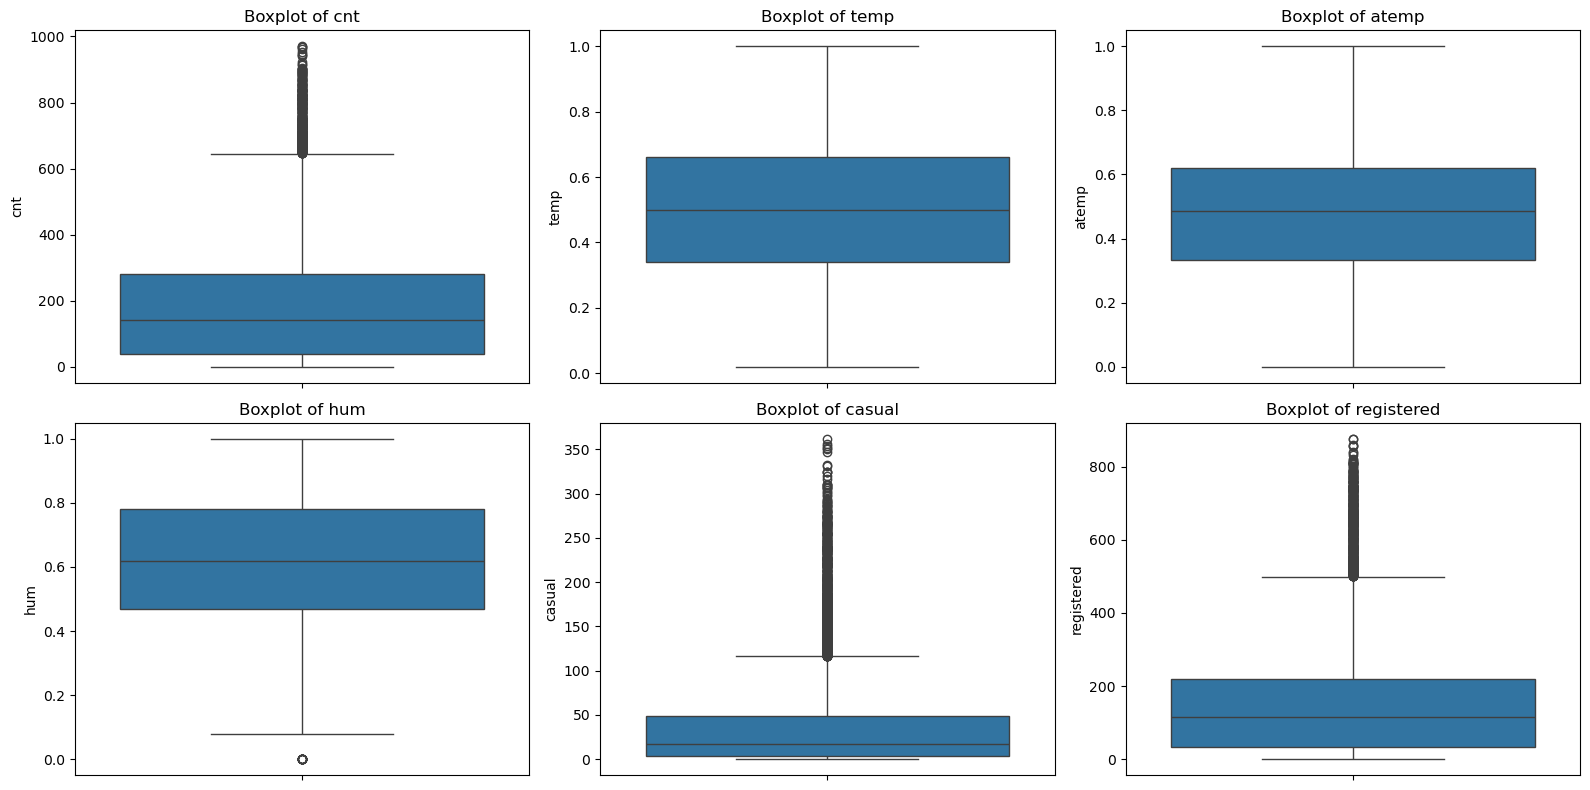

In [13]:
# Visualize outliers for numerical features using boxplots
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'casual', 'registered']
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### **Summary and Insights on Outliers, Feature Distributions, Pie Plot, and Bar Plots**

---

#### 1. Outliers

- From the boxplots, it is evident that there are considerable outliers within the casual and registered user counts; this is understandable because of user behavioral fluctuations, extraordinary events, or system irregularities.
- The variable of interest `cnt` (total rentals) is moderately right skewed with a few high-value outliers suggesting spikes in demand.
- The features `temp`, `atemp`, and `hum` have stable measurements because these features exhibit slight skewness alongside low outlier values.

---

#### 2. Feature Distributions

**Numerical Features:**
- Rental hours for `temp`, `atemp`, and `hum` are likely to occur under moderate weather conditions, as these features display a near-normal distribution.

**Categorical Features:**
- Rentals have a high occurrence frequency during the weekdays.
- Rentals peak at the user's commute times around 8 am and 5 pm.
- Rentals are considerably high during clear weather conditions and moderate temperatures.
- There are consistently more registered users than casual users, particularly during peak times.
- Rentals tend to reduce significantly during public holidays accompanied with adverse weather (Mist, Rain) negatively impacts rentals.

---

#### 3. Registered vs Casual Users Pie Plot

- As shown in the corresponding pie chart, it is clear that registered users account for more than 80% of total rentals, making them the largest group. Casual users make up a smaller portion.
- This underscores why demand forecasting and business strategy should concentrate on the behavior of registered users.

---

#### 4. Bar Plots (Average Rentals by Hour and Weather)

- Stacked bar plots for the thick of commuter traffic show both casual and registered rentals peak, albeit the registered user overlap surges beyond the casual peaks.
- Bar plots by weather show that both user categories strongly prefer clear weather, but rental uptake sharply declines as the weather worsens.
- The influence of time of day combined with weather is strong reinforcing on these rental demand dynamics.

---

#### 5. Business Implications

- Availability and service should be concentrated during peak demand windows and clear weather for best value captured; this should drive Operational planning.
- Special occasions or events may fall outside the norm; exploring these might uncover some business value or issues with data capture.
- Business intelligence and model accuracy may benefit from deeper analysis with feature engineering such as extracting day of the week or marking holidays and events.

---

## **EDA**

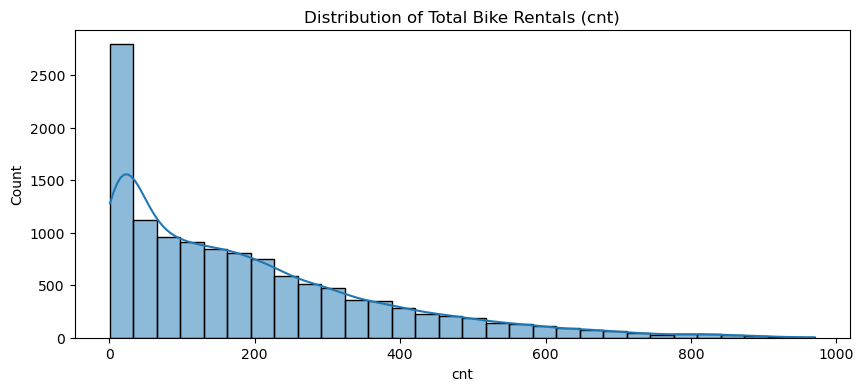

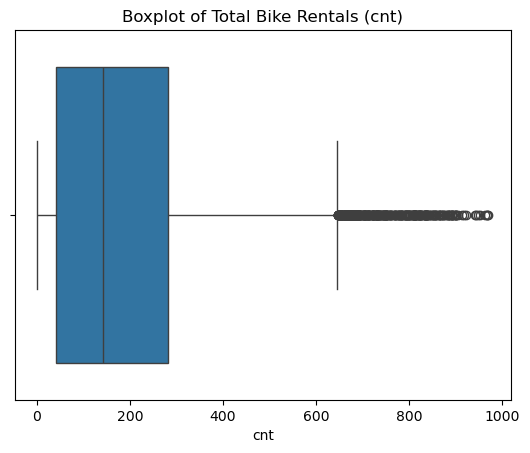

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.show()

sns.boxplot(x=df['cnt'])
plt.title('Boxplot of Total Bike Rentals (cnt)')
plt.show()


INSIGHT!

> - **Distribution Plot:** Right-skewed with some long tail values.

> - **Boxplot Insight:** Shows mild to moderate outliers in total rentals.

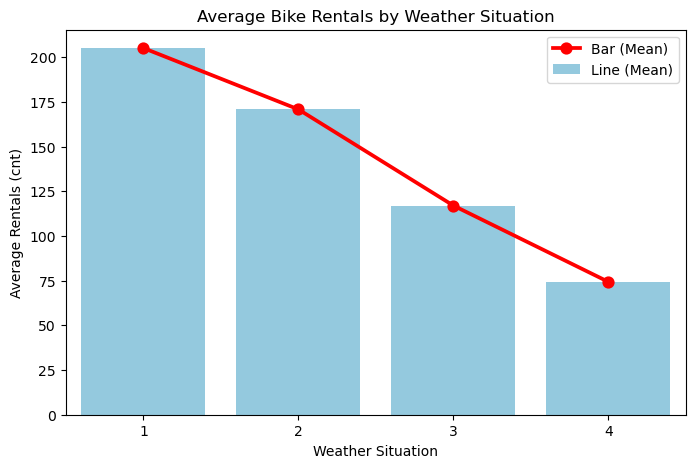

In [15]:
plt.figure(figsize=(8, 5))

# Barplot: Average bike rentals by weather situation
sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean, ci=None, color='skyblue', label='Bar (Mean)')

# Lineplot: Average bike rentals by weather situation
sns.pointplot(x='weathersit', y='cnt', data=df, estimator=np.mean, ci=None, color='red', label='Line (Mean)', markers='o')

plt.title('Average Bike Rentals by Weather Situation')
plt.ylabel('Average Rentals (cnt)')
plt.xlabel('Weather Situation')
plt.legend(['Bar (Mean)', 'Line (Mean)'])
plt.show()


INSIGHT!
> Rentals decrease in poor weather situations (weathersit = 3 shows sharp drop).

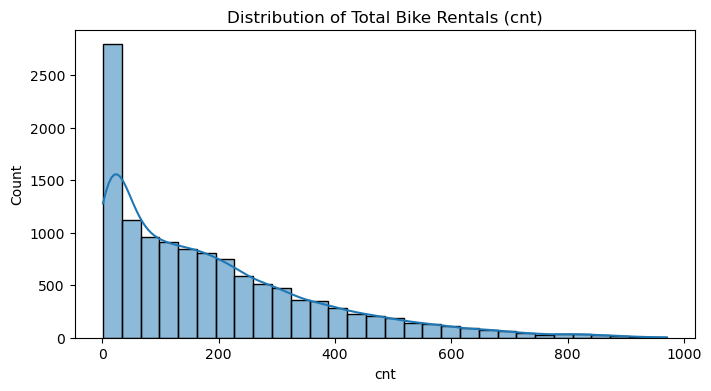

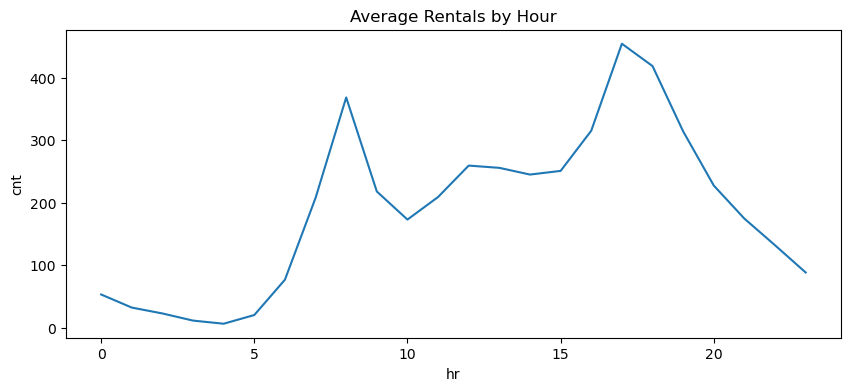

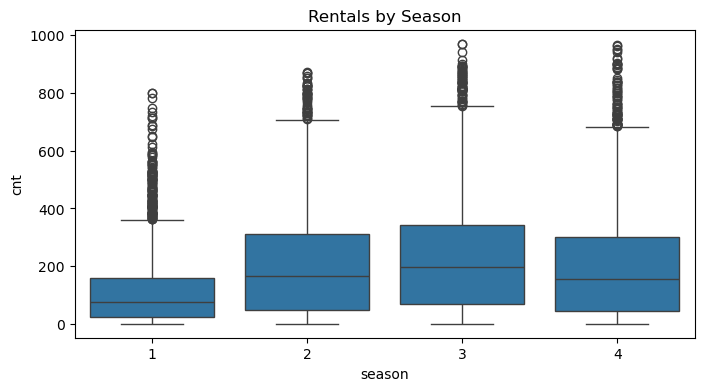

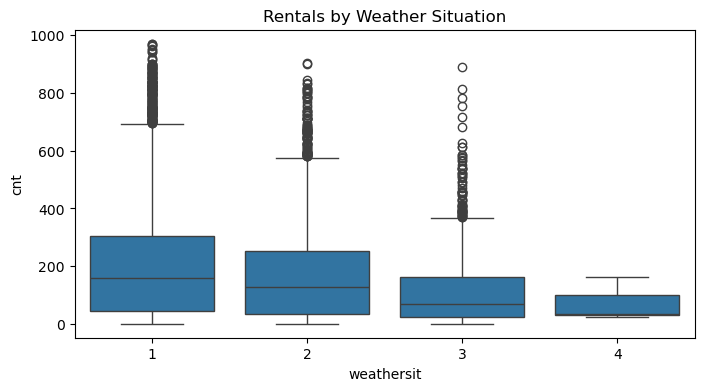

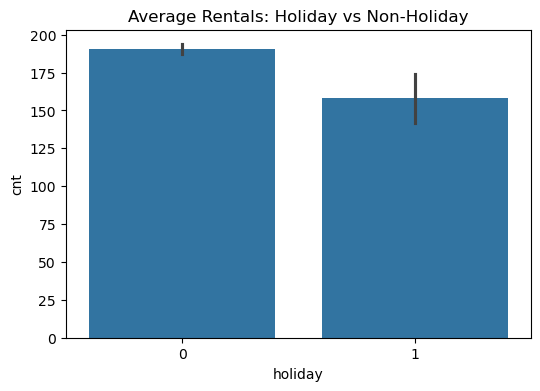

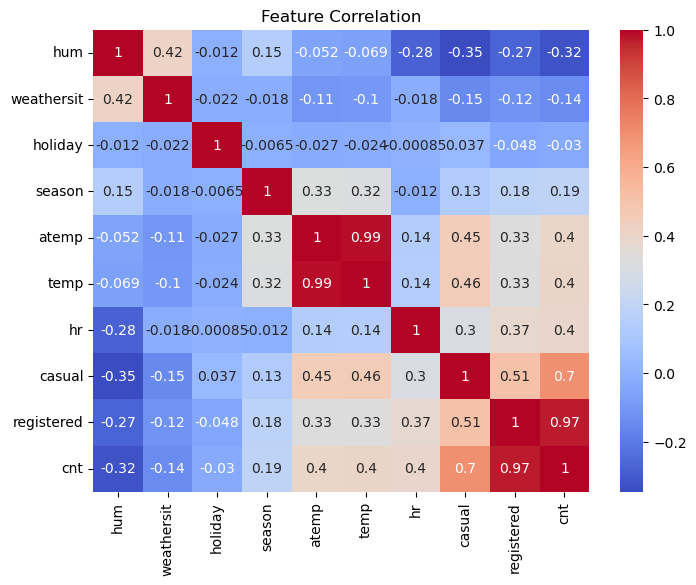

In [16]:
# Distribution of cnt
plt.figure(figsize=(8,4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.show()

# Average rentals by hour
plt.figure(figsize=(10,4))
sns.lineplot(x='hr', y='cnt', data=df.groupby('hr')['cnt'].mean().reset_index())
plt.title('Average Rentals by Hour')
plt.show()

# Boxplot by season
plt.figure(figsize=(8,4))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Rentals by Season')
plt.show()

# Boxplot by weather
plt.figure(figsize=(8,4))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Rentals by Weather Situation')
plt.show()

# Bar plot: Holiday vs Non-Holiday
plt.figure(figsize=(6,4))
sns.barplot(x='holiday', y='cnt', data=df)
plt.title('Average Rentals: Holiday vs Non-Holiday')
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


INSIGHT!

> - **Hourly Rentals:** Peak at 8 AM and 5-6 PM — commuting hours.
> - **Seasonal Boxplot:** Highest rentals in season 3 (Autumn/Fall).
> - **Holiday Barplot:** Slight drop in rentals on holidays.

---

### **Define features and Target (X and y)** 

In [17]:
X = df.drop('cnt', axis=1)
y = df['cnt']

- Different data types features:
    - Categorical: season, weathersit, holiday, hr
    - Numerical: temp, atemp, hum

In [18]:
catf = ['season', 'weathersit', 'holiday', 'hr']
numf = ['temp', 'atemp', 'hum']

**Split Data**

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Column Transformer**

- Preprocessing:
    - Scaling: Numerical features using StandardScaler
    - Encoding: Categorical using OneHotEncoder

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numf),
        ('cat', OneHotEncoder(drop='first'), catf)
    ]
)

Pipeline

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numf),
        ('cat', OneHotEncoder(drop='first'), catf)
    ]
)

# Build the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'atemp', 'hum']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['season', 'weathersit',
                                                   'holiday', 'hr'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [22]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 109.52962206748255
R2 Score: 0.615062996019738


INSIGHT!
> - RMSE : 109.529622
> - R2 SCORE: 0.61506

> - RMSE (Root Mean Squared Error): Estimates model’s average error in predicting cnt

> - R² Score: Indicates model fit (closer to 1 = better)

Modeling

Refit for Random Forest

In [23]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'atemp', 'hum']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['season', 'weathersit',
                                                   'holiday', 'hr'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## **HYPERPARAMETER TUNING**

In [24]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 20, None]
}

search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)
print(search.best_params_)

{'regressor__max_depth': 20, 'regressor__n_estimators': 200}


INSIGHT!
> - REGRESSOR MAX DEPTH: 20
> - REGRESSOR N ESTIMATORS: 200

> Method? `GridsSearchCV`

> Parameter Tuned?: 
>   - `n_estimators` (Number of Trees)
>   - `max_depth` (The Depth of the Tree)

## **COMPARING THE TEST MODELS: WHICH ONE IS THE BEST TO USE?**

Models Compared:

- Linear Regression
- Ridge
- Lasso
- Decision Tree
- Random Forest
- Gradient Boosting

Metrics Reported: 
  - RMSE, 
  - MAE, 
  - R², 
  - MAPE

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Use your existing ColumnTransformer
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred)
    }

pd.DataFrame(results).T

,RMSE,MAE,R2,MAPE
Linear Regression,109.601227,79.112957,0.614560,2.417644
Ridge,109.598880,79.074595,0.614576,2.413524
Lasso,114.321824,83.401041,0.580642,2.393122
Decision Tree,137.205304,88.825983,0.395956,1.077178
Random Forest,109.529622,71.954142,0.615063,0.947500
Gradient Boosting,106.404237,74.863830,0.636718,1.544035


INSIGHT!

> - Best Performer: Gradient Boosting followed by Random Forest

> - RMSE: Gradient Boosting = 106.40

> - MAE: Random Forest = 71.95

> - R²: Gradient Boosting = 0.64

> - MAPE: Random Forest = 0.95

---

> #  **📊 SUMMARY**

### **📌 Data Exploration:**

- The target cnt has a right skew and thick tails which indicates the very high rental days are rare.
- The rentals dominate during the registered hours and commuting hours. Rentals peak in the fall as well (season 3, Autumn/Fall).
- Bad holidays and poor weather decrease rentals a lot.

### **📌 Preprocessing Strategy:**

- Categorical features: OneHot encoded categories.
- Numerical features: Normalized contributions.
- Target: cnt (total rentals).

### **📌 Evaluating the Model:**

- Best Model Overall: Gradient Boosting.
- Best balance between bias and variance.
- Random forest performed comparably, particularly on MAPE.
- The linear models (Linear, Ridge, Lasso) did poorly which could be due to non-linear relationships.

### **✅ Recommendations That Can Be Implemented**

- More Feature Engineering: Add lag features, or include weekday, workingday for better outcomes.
- Use RobustScaler instead of just StandardScaler
- Ensemble Methods: Explore stacking Random Forest with Gradient Boosting.

---

# 🚲 Bike Sharing Prediction Project: Executive Summary and Workflow
## 🎯 Goals
Utilize available weather information, seasonality, time, user habits, and other relevant data to forecast the total bike rentals (cnt). To achieve this, one has to identify the best model which explains bike rental behavior while explaining the most salient features.

## 🔁 Step-by-Step Project Flow
## 1. 📥 Importing Data: Collection and Review Data Checks
The dataset was imported via pandas.

### Verified:

Missing values: None
Duplicate rows: None
Dataset shape: Large enough for robust modeling

## 2. 📊 Exploratory Data Analysis (EDA)
### a. Univariate Analysis
Distribution of key numerical variables (cnt, temp, hum…).

Countplots for season, hr, and holiday as categorical variables.

### b. Bivariate Analysis
Correlation matrix revealed:
- Strongest correlation: registered ↔ cnt
- Also moderate correlation of temp and atemp.

### c. Statistical Metrics
Skewness & Kurtosis:
- casual and registered were both highly right-skewed.
- Suggest heavy-tailed distributions with outliers.

### d. Temporal Visuals
Hourly Demand exhibited a bimodal cadence: 8 am & 5-6 pm peaks.

- Seasonality: Rentals highest during fall.
- Weather: A drastic drop during bad weather.

### e. Outlier Analysis
Highlighted from Boxplots:

High variance and outliers in the “casual” and “registered” rentals.

## 3. 🧹 Data Cleaning
Feature Breakdown:

- Numerics: temp, atemp, hum

- Categorical: season, weathersit, hr, holiday

- Target Variable: cnt

Procedure:

- Scaling via StandardScaler to numerics.

- Encoding via OneHotEncoder to categoricals.

- Train-Test Split with 80-20 ratio.

## 4. 🧠 Model Development and Assessment
### a. Baseline Model
Random Forest Regressor:

For baseline performance, RMSE and R² values were computed and logged.

### b. Hyperparameter Tuning
Applied GridSearchCV:
For Random Forest, n_estimators and max_depth were optimized.

### c. Model Comparison
Six Models were assessed:

- Linear Regression
- Ridge 
- Lasso
- Decision Tree
- Random Forest
- Gradient Boosting

### d. Metrics Reported:
RMSE, MAE, R², and MAPE.

### e. Findings:
The leading model was Gradient Boosting:

- RMSE: 106.4
- R²: 0.64
- Random Forest closely followed, performing best on MAPE (0.95%).

## 📌 Key Takeaways
registered, `hr`, `temp`, and `season` as key predictors.

Model insights:
- Non-linear relationships presented challenges for linear models.
- Tree-based models performed better because they are capable of capturing more of the underlying complexity.

## ✅ Next Recommendations
- More Feature Engineering: Add lag features, or include weekday, workingday for better outcomes.
- Use RobustScaler instead of just StandardScaler
- Ensemble Methods: Explore stacking Random Forest with Gradient Boosting.

Here is your cleaned and corrected Markdown document, with special attention paid to the formatting and alignment of the **Model Results** table, general grammar, consistent terminology, and overall Markdown structure.

---

# Predicting Demand for Bike Sharing Projects

This repository hosts a machine learning project focused on estimating hourly bike rental demand using regression techniques on a bike-sharing dataset. The goal is to assist city operators and planners in improving user satisfaction through data-driven decisions for operational and strategic planning.

---

## Goals

* Develop and assess a machine learning model capable of predicting rental demand on an hourly basis.
* Design an interpretable model that highlights key drivers influencing rental demand.
* Assist in achieving the precision required for operational planning of bike-sharing services.

---

## Tools Used

### Software Engineering Tool

* **Python** – Primary language for data processing and machine learning tasks.

### Libraries & Frameworks

* **Pandas** – Data handling and analysis.
* **NumPy** – Scientific computations.
* **Matplotlib & Seaborn** – Data visualization.
* **Scikit-learn** – Data preprocessing, model training, and evaluation.
* **Jupyter Notebook** – Exploratory data analysis and project documentation.

---

## Project Structure

```
├── README.md                             <- Project summary and documentation
├── Data
│   ├── bike_sharing_data.csv             <- Dataset
│   └── Bike Sharing Dataset.pdf          <- Dataset description
├── Model
│   ├── model_GradientBoosting.sav        <- Pickle model
│   └── model_GradientBoosting.joblib     <- Joblib model
├── Notebook
│   └── Bike-Sharing.ipynb                <- Main Jupyter notebook
└── requirements.txt                      <- Dependencies list
```

---

## Business Problem & Approach

Managing Capital Bikeshare in Washington D.C. with over 700 stations and 5,400 bikes presents challenges. Accurate demand forecasting helps:

* Prevent over-congestion or under-capacity at docking stations.
* Improve user satisfaction through optimal bike availability.
* Support policymakers in infrastructure planning.

### Steps Taken

1. **Data Collection & Understanding**

   * Hourly rentals, weather data, and time-based indicators.

2. **Data Cleaning & Preparation**

   * Handling missing data, preventing leakage, and creating features.

3. **Feature Engineering**

   * Key predictors: hour, season, holidays, weather, temperature, “feels like” temperature, and humidity.

4. **Data Splitting**

   * 80% for training, 20% for evaluation.

5. **Preprocessing**

   * Standard scaling for numerical features and encoding for categorical variables.

6. **Modeling**

   * Algorithms used: Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting.

7. **Hyperparameter Tuning**

   * GridSearchCV and RandomizedSearchCV.

8. **Evaluation**

   * Metrics: RMSE, MAE, MAPE, R².

---

## Model Evaluation Metrics

* **RMSE (Root Mean Squared Error):** Measures overall prediction error.
* **MAE (Mean Absolute Error):** Average of absolute prediction errors.
* **MAPE (Mean Absolute Percentage Error):** Accuracy expressed as a percentage.
* **R² (Coefficient of Determination):** Indicates model’s explanatory power (0 to 1).

---

## Model Results

| Model             | RMSE   | MAE   | R²    | MAPE |
| ----------------- | ------ | ----- | ----- | ---- |
| Linear Regression | 109.60 | 79.11 | 0.615 | 2.42 |
| Ridge             | 109.60 | 79.07 | 0.615 | 2.41 |
| Lasso             | 114.32 | 83.40 | 0.581 | 2.39 |
| Decision Tree     | 137.21 | 88.83 | 0.396 | 1.08 |
| Random Forest     | 109.53 | 71.95 | 0.615 | 0.95 |
| Gradient Boosting | 106.40 | 74.86 | 0.637 | 1.54 |

The **Gradient Boosting** model delivered the best performance, with the lowest RMSE and the highest R², indicating it explains approximately 64% of the variance in hourly rentals.

---

## Conclusion

* **Gradient Boosting** was the most effective model for predicting hourly bike rental demand.
* Key influencing factors included temperature, time of day, and season.
* Accurate demand forecasting enables better operations, enhances user experience, and optimizes resource management.

---

## Contact Me

* **Name:** Clarinda Puspitajati
* **Email:** [clarindapj@gmail.com](mailto:clarindapj@gmail.com)
* **LinkedIn:** [Clarinda's LinkedIn](https://www.linkedin.com/in/clarindapj/)
